In [213]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### <font color='#00d2d3'> Importer les packages

In [214]:
# Importer les packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords') # Télécharger le package stopwords
nltk.download('wordnet')
from nltk.corpus import stopwords # Importer le package stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### <font color='#00d2d3'> Importer et lire les données

In [215]:
# Importation des données Tweets_data
df1 = pd.read_csv("/content/drive/MyDrive/NLP_docs_4/Assignment 1/Tweets_data.csv")
# Afficher les données
df1

,coachella_sentiment,text
0,positive,#Coachella2015 tickets selling out in less tha...
1,positive,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...
2,positive,#Coachella2015 #VIP passes secured! See you th...
3,positive,PhillyÛªs @warondrugsjams will play #Coachell...
4,positive,If briana and her mom out to #Coachella2015 i...
...,...,...
3841,cant tell,Excuse me while I go cry now. _Ù÷¢ #Coachella2...
3842,cant tell,RT @touchofallright: Ride and Steely Dan. It w...
3843,cant tell,I've been callin that since day one #Coachella...
3844,cant tell,Is this for real?!?! #Coachella2015 http://t.c...


In [216]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3846 entries, 0 to 3845
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   coachella_sentiment  3846 non-null   object
 1   text                 3846 non-null   object
dtypes: object(2)
memory usage: 60.2+ KB


In [217]:
# Importation des données tweet_data
df2 = pd.read_csv("/content/drive/MyDrive/NLP_docs_4/Assignment 1/tweet_data.csv")
# Afficher les données
df2

,label,tweet
0,1,@user homegrown rightie white americans are 10...
1,1,"@user @user is this a new one? either way, #m..."
2,0,i am thankful for pillows. #thankful #positive...
3,0,it's unfounate today that aids is under contro...
4,0,i am super. #i_am #positive #affirmation
...,...,...
4479,0,@user yay! congrats @user for a great album...
4480,1,@user #theresistance #notmypresident #russiaga...
4481,0,just the 2 of usâ£â£â£â£â£â£â£ #me #sel...
4482,1,@user did someone say #antisemetic ? gee (((@u...


In [219]:
# Dimension des données
df1.shape

(3846, 2)

In [220]:
# Dimension des données
df2.shape

(4484, 2)

# Concatenation de Tweets_data et tweet_data

In [221]:
df1 = df1.rename(columns ={"coachella_sentiment" : "label"})
df1

,label,text
0,positive,#Coachella2015 tickets selling out in less tha...
1,positive,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...
2,positive,#Coachella2015 #VIP passes secured! See you th...
3,positive,PhillyÛªs @warondrugsjams will play #Coachell...
4,positive,If briana and her mom out to #Coachella2015 i...
...,...,...
3841,cant tell,Excuse me while I go cry now. _Ù÷¢ #Coachella2...
3842,cant tell,RT @touchofallright: Ride and Steely Dan. It w...
3843,cant tell,I've been callin that since day one #Coachella...
3844,cant tell,Is this for real?!?! #Coachella2015 http://t.c...


In [222]:
df1 = df1.rename(columns ={"text" : "tweet"})
df1

,label,tweet
0,positive,#Coachella2015 tickets selling out in less tha...
1,positive,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...
2,positive,#Coachella2015 #VIP passes secured! See you th...
3,positive,PhillyÛªs @warondrugsjams will play #Coachell...
4,positive,If briana and her mom out to #Coachella2015 i...
...,...,...
3841,cant tell,Excuse me while I go cry now. _Ù÷¢ #Coachella2...
3842,cant tell,RT @touchofallright: Ride and Steely Dan. It w...
3843,cant tell,I've been callin that since day one #Coachella...
3844,cant tell,Is this for real?!?! #Coachella2015 http://t.c...


In [223]:
df_concat = pd.concat([df1, df2])
df_concat

,label,tweet
0,positive,#Coachella2015 tickets selling out in less tha...
1,positive,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...
2,positive,#Coachella2015 #VIP passes secured! See you th...
3,positive,PhillyÛªs @warondrugsjams will play #Coachell...
4,positive,If briana and her mom out to #Coachella2015 i...
...,...,...
4479,0,@user yay! congrats @user for a great album...
4480,1,@user #theresistance #notmypresident #russiaga...
4481,0,just the 2 of usâ£â£â£â£â£â£â£ #me #sel...
4482,1,@user did someone say #antisemetic ? gee (((@u...


In [224]:
# Concaténation des deux dataframes
df_concat = pd.concat([df1, df2])

### <font color='#00d2d3'> Pré-traitement des données

In [225]:
# Nombre d'observations dans chaque classe
df_concat.label.value_counts()

positive     2283
1            2242
0            2242
neutral       928
negative      553
cant tell      82
Name: label, dtype: int64

In [226]:
df_concat["label"] = df_concat["label"].replace("positive", 0)

In [227]:
df_concat["label"] = df_concat["label"].replace("negative", 1)

In [228]:
df_concat = df_concat.drop(df_concat[df_concat["label"] == "neutral"].index)

In [229]:
df_concat = df_concat.drop(df_concat[df_concat["label"] == "cant tell"].index)

In [230]:
# Réinitialisation des index
df_concat = df_concat.reset_index(drop=True)

In [232]:
df_concat["label"] = df_concat["label"].replace(0, 2)
df_concat["label"] = df_concat["label"].replace(1, 0)

In [233]:
df_concat["label"] = df_concat["label"].replace(2, 1)

In [234]:
# Nombre d'observations dans chaque classe
df_concat.label.value_counts()

1    4009
0    2301
Name: label, dtype: int64

- 0 : Negative
- 1 : Positive

In [236]:
# Réinitialisation des index
df_concat = df_concat.reset_index(drop=True)

In [237]:
df_concat["tweet"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6310 entries, 0 to 6309
Series name: tweet
Non-Null Count  Dtype 
--------------  ----- 
6310 non-null   object
dtypes: object(1)
memory usage: 49.4+ KB


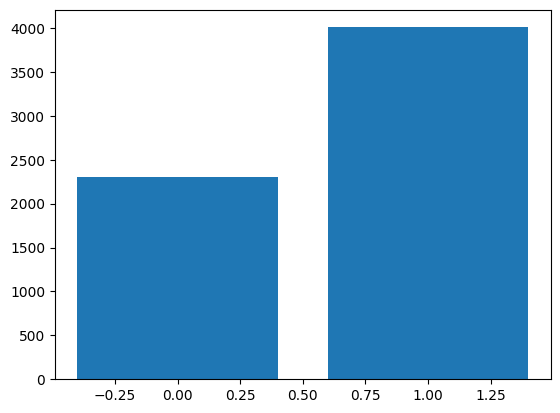

In [238]:
# Bar plot des nombres d'observations dans chaque classe
plt.bar(df_concat.label.value_counts().index, df_concat.label.value_counts().values)
plt.xticks()
plt.show()

#### <font color='#00d2d3'> Pré-traitement des données textuelles

In [239]:
# Afficher la première ligne de la colonne tweet
df_concat["tweet"][0]

'#Coachella2015 tickets selling out in less than 40 minutes _Ù_¦_Ù___Ù___Ù÷\x9d_ÙÎµ_ÙÎµ_Ù___Ù_¦ http://t.co/SmoXyteIMJ'

In [240]:
# Afficher la deuxième ligne de la colonne tweet
df_concat["tweet"][1]

'RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ´_ÙÓ´_ÙÓ´ #Coachella2015 http://t.co/Ov2eCJtAvR'

In [241]:
df_concat

,label,tweet
0,1,#Coachella2015 tickets selling out in less tha...
1,1,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...
2,1,#Coachella2015 #VIP passes secured! See you th...
3,1,PhillyÛªs @warondrugsjams will play #Coachell...
4,1,If briana and her mom out to #Coachella2015 i...
...,...,...
6305,1,@user yay! congrats @user for a great album...
6306,0,@user #theresistance #notmypresident #russiaga...
6307,1,just the 2 of usâ£â£â£â£â£â£â£ #me #sel...
6308,0,@user did someone say #antisemetic ? gee (((@u...


###### <font color='#1dd1a1'> Commencer le nettoyage des tweets


In [242]:
# Fonction supprimant les links
def remove_links(tweet):
  tweet = re.sub(r"https?://\S+","", tweet)
  return tweet

In [243]:
# Exemple
tweet ='The urls of my webpages is http://analysis.com https://abdoul.com'
tweet = remove_links(tweet)
tweet

'The urls of my webpages is  '

In [244]:
# Fonction supprimant les @username
def remove_users(tweet):
  tweet = re.sub(r"@[\w\-._]+", "", tweet)
  return tweet

In [174]:
# Exemple
tweet ='My username is @projet_NLP'
tweet = remove_users(tweet)
tweet

'My username is '

In [245]:
# Supprimer les adresses emails
def email_address(tweet):
  tweet = re.sub(r"[\w\-._]+@[\w\-._]+", "", tweet)
  return tweet

In [246]:
# Exemple
tweet ='My email adress is the following : institut_dakar07@gmail.com'
tweet = email_address(tweet)
tweet

'My email adress is the following : '

In [247]:
!pip install contractions

In [248]:
import contractions
# Fonction étendant les contractions
def contraction(tweet):
    expanded_all = []
    for word in tweet.split():
        expanded_all.append(contractions.fix(word)) # utiliser la fonction fix de contractions

    expand = ' '.join(expanded_all)
    return expand

In [249]:
# Exemple
tweet ="That's the right thing to do"
tweet = contraction(tweet)
tweet

'That is the right thing to do'

In [250]:
# Supprimer html caractères
def clean_html(tweet):
  tweet = re.sub(r"&\w+", "", tweet)
  return tweet

In [251]:
# Exemple
tweet ='#World What a shame &amp'
tweet = clean_html(tweet)
tweet

'#World What a shame '

In [253]:
# Remplacer tout ce qui n'est chaines de caractères alphabétiques et espace par ' '
def alpha_b(tweet):
  tweet = re.sub(r"[^a-zA-Z\s]+", " ", tweet)
  return tweet

In [254]:
# Exemple
tweet = 'My year of birth is 2050 #happy'
tweet = alpha_b(tweet)
tweet

'My year of birth is    happy'

In [255]:
# Fonction remplaçant les espaces multiples et convertissant majuscules en minuscules
def lower(tweet):
  tweet = re.sub(r"\s{2,}", " ", tweet)
  return tweet.lower()

In [256]:
# Supprimer les espaces en début et fin de tweet
def clean_space(tweet):
  tweet = re.sub(r"^\s|\s$", "", tweet)

In [257]:
tweet = ' My year of birth is 2050 #happy '
tweet = clean_space(tweet)
tweet

In [258]:
# Fonction supprimant les stopwords
def remove_stopwords(text):
    Stopwords = stopwords.words('english')
    #tweet= " ".join([word for word in text.split() if word not in Stopwords])
    tweet= " ".join([word for word in text.split() if word not in Stopwords])
    return tweet

In [259]:
# Exemple
tweet = 'Life is a mess for some people'
tweet = remove_stopwords(tweet)
tweet

'Life mess people'

In [260]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
def lem_sw(tweet):
    tweet = [lemma.lemmatize(word) for word in tweet.split()]
    tweet = " ".join(tweet)
    return tweet

In [261]:
tweet = 'Life is a mess for some people of international'
tweet = lem_sw(tweet)
tweet

'Life is a mess for some people of international'

In [262]:
df_concat

,label,tweet
0,1,#Coachella2015 tickets selling out in less tha...
1,1,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...
2,1,#Coachella2015 #VIP passes secured! See you th...
3,1,PhillyÛªs @warondrugsjams will play #Coachell...
4,1,If briana and her mom out to #Coachella2015 i...
...,...,...
6305,1,@user yay! congrats @user for a great album...
6306,0,@user #theresistance #notmypresident #russiaga...
6307,1,just the 2 of usâ£â£â£â£â£â£â£ #me #sel...
6308,0,@user did someone say #antisemetic ? gee (((@u...


###### <font color='#1dd1a1'> Appliquer les différentes fonctions sur les tweets



In [263]:
# Appliquer la fonction remove_users
df_concat["new_tweet"] = df_concat.tweet.apply(func = remove_users)
# Appliquer la fonction remove_links
df_concat["new_tweet"] = df_concat.new_tweet.apply(func = remove_links)
# Appliquer la fonction email_address
df_concat["new_tweet"] = df_concat.new_tweet.apply(func = email_address)
# Appliquer la fonction remove_contraction
df_concat["new_tweet"] = df_concat.new_tweet.apply(func = contraction)
# Appliquer la fonction clean_html
df_concat["new_tweet"] = df_concat.new_tweet.apply(func = clean_html)
# Appliquer la fonction alpha_b
df_concat["new_tweet"] = df_concat.new_tweet.apply(func = alpha_b)
# Appliquer la fonction lower
df_concat["new_tweet"] = df_concat.new_tweet.apply(func = lower)
# Appliquer la fonction clean_space
#df_concat["new_tweet"] = df_concat.new_tweet.apply(func = clean_space)
# Appliquer la fonction remove_stopwords
df_concat["new_tweet"] = df_concat.new_tweet.apply(func = remove_stopwords)
# Appliquer la fonction lem_sw
df_concat["new_tweet"] = df_concat.new_tweet.apply(func = lem_sw)

In [265]:
# Afficher df
df_concat

,label,tweet,new_tweet
0,1,#Coachella2015 tickets selling out in less tha...,coachella ticket selling le minute
1,1,RT @sudsybuddy: WAIT THIS IS ABSOLUTE FIRE _ÙÓ...,rt wait absolute fire coachella
2,1,#Coachella2015 #VIP passes secured! See you th...,coachella vip pass secured see bitch
3,1,PhillyÛªs @warondrugsjams will play #Coachell...,philly play coachella govball watch jimmy fallon
4,1,If briana and her mom out to #Coachella2015 i...,briana mom coachella
...,...,...,...
6305,1,@user yay! congrats @user for a great album...,yay congrats great album number rickastley
6306,0,@user #theresistance #notmypresident #russiaga...,theresistance notmypresident russiagate voters...
6307,1,just the 2 of usâ£â£â£â£â£â£â£ #me #sel...,u selfie myfriend loveher giannena smile theco...
6308,0,@user did someone say #antisemetic ? gee (((@u...,someone say antisemetic gee bit triggered eh


In [266]:
df_concat["new_tweet"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 6310 entries, 0 to 6309
Series name: new_tweet
Non-Null Count  Dtype 
--------------  ----- 
6310 non-null   object
dtypes: object(1)
memory usage: 49.4+ KB


### <font color='#00d2d3'> Vectorisation

In [267]:
# Importer les packages
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [268]:
# Nombre de mots
voc_size = len(set(" ".join(df_concat.new_tweet).split()))
# Initialiser le modèle Tokenizer
tokenizer = Tokenizer(num_words=voc_size, split=' ')
# Entrainer les données
tokenizer.fit_on_texts(df_concat['new_tweet'].values)
# Vectoriser
X_token = tokenizer.texts_to_sequences(df_concat['new_tweet'].values)
# Padding
X = pad_sequences(X_token)

In [269]:
X

array([[   0,    0,    0, ...,  622,  313,  262],
       [   0,    0,    0, ..., 1902,  748,    1],
       [   0,    0,    0, ..., 2523,    8,  442],
       ...,
       [   0,    0,    0, ..., 9854,  148, 9855],
       [   0,    0,    0, ...,  406, 1465, 1636],
       [   0,    0,    0, ...,  110, 1188, 1017]], dtype=int32)

In [270]:
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    1,   14,  622,  313,  262],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    4,   27, 1902,  748,    1],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    1, 1073,  749, 2523,    8,  442],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0, 3932,  168,    1, 1074,  263, 1263, 3933],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0, 3934,  381,    1]],
      dtype=int32)

In [271]:
df_concat.label

0       1
1       1
2       1
3       1
4       1
       ..
6305    1
6306    0
6307    1
6308    0
6309    0
Name: label, Length: 6310, dtype: int64

In [272]:
# données train, test et val
from sklearn.model_selection import train_test_split
y = df_concat.label.values
x_train, x_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.5, random_state=42)

In [273]:
x_train.shape, x_val.shape, x_test.shape, len(y), len(X)

((5048, 20), (631, 20), (631, 20), 6310, 6310)

In [274]:
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')
x_val = x_val.astype('float32')
y_val = y_val.astype('float32')

In [275]:
from keras.preprocessing.sequence import pad_sequences

# Assurez-vous que vos séquences ont la même longueur
max_sequence_length = 20
x_train_padded = pad_sequences(x_train, maxlen=max_sequence_length)
x_test_padded = pad_sequences(x_test, maxlen=max_sequence_length)

# Vérifiez à nouveau les formes
print("Nouvelle forme de x_train:", x_train_padded.shape)
print("Forme de y_train:", y_train.shape)


Nouvelle forme de x_train: (5048, 20)
Forme de y_train: (5048,)


In [276]:
x_train =  x_train_padded
x_test =  x_test_padded

In [277]:
x_train.shape, x_test.shape

((5048, 20), (631, 20))

In [278]:
print(f'Shapes after correction:')
print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_val: {x_val.shape}, y_val: {y_val.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')


Shapes after correction:
x_train: (5048, 20), y_train: (5048,)
x_val: (631, 20), y_val: (631,)
x_test: (631, 20), y_test: (631,)


### <font color='#00d2d3'> Sentiment Analysis avec LSTM Bi-directional LSTM GRU Bi-directional GRU

In [279]:
# modèles GRU ,Bidirectionnal GRU ,LSTM , Bidirectionnal LSTM

from keras.models import Sequential
from keras.layers import Embedding, GRU, Bidirectional, LSTM, Dense, Dropout

# Paramètres communs
embedding_dim = 100
max_sequence_length = 20
dropout_rate = 0.4

# Définir les modèles
def build_gru_model():
    model = Sequential()
    model.add(Embedding(input_dim=voc_size, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(GRU(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(GRU(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_bidirectional_gru_model():
    model = Sequential()
    model.add(Embedding(input_dim=voc_size, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(Bidirectional(GRU(64, activation='relu')))
    model.add(Dropout(dropout_rate))
    model.add(Bidirectional(GRU(32, activation='relu')))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=voc_size, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(LSTM(128, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(64, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    return model

def build_bidirectional_lstm_model():
    model = Sequential()
    model.add(Embedding(input_dim=voc_size, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(Bidirectional(LSTM(64, activation='relu')))
    model.add(Dropout(dropout_rate))
    model.add(Bidirectional(LSTM(32, activation='relu')))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [280]:
!pip install keras-tuner

In [281]:
from keras.models import Sequential
from keras.layers import Embedding, GRU, Bidirectional, LSTM, Dense, Dropout
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Paramètres communs
voc_size = 10000
embedding_dim = 100
max_sequence_length = 20
epochs = 10
batch_size = 32

# Fonction de construction du modèle avec Keras Tuner
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=voc_size, output_dim=embedding_dim, input_length=max_sequence_length))

    # Choix du type de couche récurrente
    rnn_type = hp.Choice('rnn_type', values=['gru', 'bidirectional_gru', 'lstm', 'bidirectional_lstm'])

    # Ajoutez la couche récurrente spécifiée avec un Dropout ajustable
    if rnn_type == 'gru':
        model.add(GRU(units=hp.Int('gru_units', min_value=32, max_value=256, step=32), activation='relu'))
    elif rnn_type == 'bidirectional_gru':
        model.add(Bidirectional(GRU(units=hp.Int('bidirectional_gru_units', min_value=32, max_value=256, step=32), activation='relu')))
    elif rnn_type == 'lstm':
        model.add(LSTM(units=hp.Int('lstm_units', min_value=32, max_value=256, step=32), activation='relu'))
    elif rnn_type == 'bidirectional_lstm':
        model.add(Bidirectional(LSTM(units=hp.Int('bidirectional_lstm_units', min_value=32, max_value=256, step=32), activation='relu')))

    # Ajoutez une couche Dropout ajustable
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    # Compilez le modèle avec l'optimiseur et la fonction de perte ajustables
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Instanciez le tuner
tuner = RandomSearch(build_model,
                     objective='val_accuracy',
                     max_trials=5,
                     directory='my_tuner_dir',
                     project_name='sentiment_analysis')

# Recherche d'hyperparamètres
tuner.search(x_train, y_train,
             epochs=epochs,
             batch_size=batch_size,
             validation_data=(x_val, y_val))

# Obtenez le meilleur modèle
best_model = tuner.get_best_models(num_models=1)[0]

# Résumé des résultats de la recherche
tuner.results_summary()

Reloading Tuner from my_tuner_dir/sentiment_analysis/tuner0.json
Results summary
Results in my_tuner_dir/sentiment_analysis
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
rnn_type: bidirectional_gru
gru_units: 128
dropout_rate: 0.2
optimizer: adam
lstm_units: 96
bidirectional_lstm_units: 128
bidirectional_gru_units: 32
Score: 0.8621236085891724

Trial 1 summary
Hyperparameters:
rnn_type: bidirectional_lstm
gru_units: 160
dropout_rate: 0.2
optimizer: rmsprop
lstm_units: 128
bidirectional_lstm_units: 32
Score: 0.8557844758033752

Trial 2 summary
Hyperparameters:
rnn_type: gru
gru_units: 160
dropout_rate: 0.4
optimizer: rmsprop
lstm_units: 256
bidirectional_lstm_units: 96
Score: 0.8510301113128662

Trial 0 summary
Hyperparameters:
rnn_type: lstm
gru_units: 96
dropout_rate: 0.30000000000000004
optimizer: rmsprop
lstm_units: 32
Score: 0.8510301113128662

Trial 4 summary
Hyperparameters:
rnn_type: bidirectional_lstm
gru_units: 128
dro

###### <font color='#1dd1a1'> Test le modèle

In [282]:
# Train the best model
best_model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

# Evaluate the best model on the test set
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss}')

# Save the trained model if needed
best_model.save('best_model.h5')

Epoch 1/10
158/158 [==============================] - 10s 40ms/step - loss: 0.7833 - accuracy: 0.5359 - val_loss: 0.4495 - val_accuracy: 0.8114
Epoch 2/10
158/158 [==============================] - 10s 65ms/step - loss: 0.1764 - accuracy: 0.9342 - val_loss: 0.4332 - val_accuracy: 0.8447
Epoch 3/10
158/158 [==============================] - 8s 53ms/step - loss: 0.0953 - accuracy: 0.9667 - val_loss: 0.5227 - val_accuracy: 0.8368
Epoch 4/10
158/158 [==============================] - 7s 42ms/step - loss: 0.0661 - accuracy: 0.9766 - val_loss: 0.9367 - val_accuracy: 0.8368
Epoch 5/10
158/158 [==============================] - 5s 33ms/step - loss: 0.0532 - accuracy: 0.9796 - val_loss: 0.7826 - val_accuracy: 0.7940
Epoch 6/10
158/158 [==============================] - 7s 43ms/step - loss: 0.0409 - accuracy: 0.9855 - val_loss: 1.5722 - val_accuracy: 0.8003
Epoch 7/10
158/158 [==============================] - 6s 38ms/step - loss: 0.0407 - accuracy: 0.9842 - val_loss: 0.9597 - val_accuracy: 0.83

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [283]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming x_val is your validation data and y_val is the corresponding true labels
predictions = best_model.predict(x_val)

# Assuming your predictions are probabilities, you might want to convert them to binary predictions
binary_predictions = (predictions > 0.5).astype(int)

# Compare predictions to true labels
accuracy = accuracy_score(y_val, binary_predictions)
precision = precision_score(y_val, binary_predictions)
recall = recall_score(y_val, binary_predictions)
f1 = f1_score(y_val, binary_predictions)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1 * 100:.2f}%')



20/20 [==============================] - 0s 6ms/step
Accuracy: 82.25%
Precision: 86.22%
Recall: 87.05%
F1 Score: 86.63%


In [285]:
tweet = df_concat['new_tweet'][:3]

# Vectoriser le tweet
twt = tokenizer.texts_to_sequences(tweet)

# Padding
twt = pad_sequences(twt, maxlen=x_train_padded.shape[1])

# Prédictions les labels
y_pred = best_model.predict(twt)

# Arrondir les valeurs
y_pred = np.round(y_pred)

# Afficher sentiments
for i in range(3):
    sentiment = "Negative sentiment" if int(y_pred[i][0]) == 0 else "Positive sentiment"
    print(f"{tweet[i]} --------- {sentiment}")


1/1 [==============================] - 0s 49ms/step
coachella ticket selling le minute --------- Positive sentiment
rt wait absolute fire coachella --------- Positive sentiment
coachella vip pass secured see bitch --------- Positive sentiment
